In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [9]:
students_begin = pd.read_csv('stud_math.csv')
display(students_begin.head(10))
students_begin.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Для удобства использования pandas переименуем все столбцы:

In [10]:
students = students_begin.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob',
                                          'studytime, granular': 'studytime_granular'})
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Анализ информации, содержащейся в столбцах

Столбец school

In [4]:
# рассмотрим аббревиатуры школ
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


По получившемуся результату можно сделать вывод о том, что данных по женскому полу больше. Также можно сказать о том, что лишних и отсутствующих данных в данном столбце нет

Столбец age

In [5]:
# рассмотрим распределение учеников по возрасту
pd.DataFrame(students.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

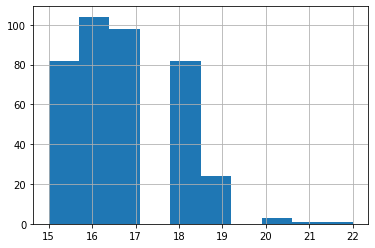

In [6]:
# выясним основные характеристики возрастных значений
students.age.hist()
students.age.describe()

По получившемуся результату можно сделать вывод о том, что подавляющее большинство данных относится к ученикам в возрасте от 15 до 18 лет. Также можно сказать о том, что лишних и отсутствующих данных в данном столбце нет

Столбец address

In [7]:
# рассмотрим распределение учеников по типу адреса
pd.DataFrame(students.address.value_counts())

,address
U,295
R,83


По получившемуся результату можно сделать вывод о том, что подавляющее большинство данных о городских учениках. Также можно сказать о наличии отсутствующих данных в данном столбце. Необходимо заменить отсутствующие данные на None.
Применим функцию для замены отсутствующих данных на None ко всем столбцам:

In [4]:
# Заменим отcутствующие данные на None
def change_none(column):
    students[column] = students[column].apply(lambda x: None if pd.isna(x) == True else x)
for col in ['address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    change_none(col)
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,-3.0,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Столбец famsize

In [9]:
# рассмотрим распределение учеников по количеству детей в семье
pd.DataFrame(students.famsize.value_counts())

,famsize
GT3,261
LE3,107


По получившемуся результату можно сделать вывод о том, что подавляющее большинство данных об учениках, в семье которых больше 3 детей. Также можно сказать о наличии отсутствующих данных в данном столбце.

Столбец pstatus

In [10]:
# рассмотрим распределение учеников по статусу совместного жилья родителей
pd.DataFrame(students.pstatus.value_counts())

,pstatus
T,314
A,36


По получившемуся результату можно сделать вывод о том, что подавляющее большинство данных об учениках, родители которых живут вместе. Также можно сказать о наличии отсутствующих данных в данном столбце.

Столбец medu

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


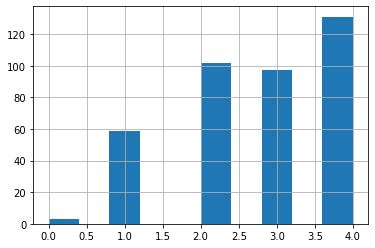

In [11]:
# рассмотрим распределение учеников по образованию матери
students.medu.hist()
pd.DataFrame(students.medu.value_counts())
# образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

По получившемуся результату можно сделать вывод о том, что подавляющее большинство данных об учениках, матери которых имеют высшее, среднеспециальное и школьное образование. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [22]:
# заменим отсутствующие значения на медианное
median_medu = students.medu.median()
display(median_medu)
students.medu = students.medu.apply(
    lambda x: median_medu if pd.isna(x) == True else x)
display(students.medu.unique())
students.loc[:, ['medu']].info()
pd.DataFrame(students.medu.value_counts())

3.0

array([4., 1., 3., 2., 0.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


Столбец fedu

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


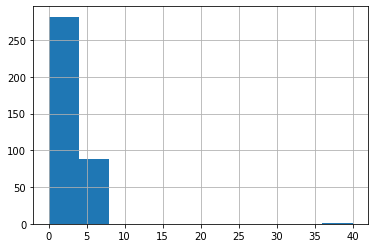

In [12]:
# рассмотрим распределение учеников по образованию отца
students.fedu.hist()
pd.DataFrame(students.fedu.value_counts())
# образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

По получившемуся результату можно сделать вывод о том, что подавляющее большинство данных об отцовском образовании равномерно распеделены по признаку его наличия. Также можно сказать о наличии отсутствующих данных в данном столбце. Имеется один выброс, который необходимо заменить на адекватное значение. Можно допустить, что при наборе информации человек ошибся и добавил лишний 0. Поэтому вместо 40 будет 4

In [13]:
# устраним выброс значения
students.fedu = students.fedu.astype(str).apply(
    lambda x: '4.0' if x== '40.0' else x)
students.loc[:, ['fedu']].info()
pd.DataFrame(students.fedu.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fedu    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


In [21]:
# заменим отсутствующие значения на медианное
median_fedu = students.fedu.median()
display(median_fedu)
students.fedu = students.fedu.apply(
    lambda x: median_fedu if pd.isna(x) == True else x)
display(students.fedu.unique())
students.loc[:, ['fedu']].info()
pd.DataFrame(students.fedu.value_counts())

2.0

array(['4.0', '1.0', '2.0', '3.0', '0.0'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fedu    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


Столбец mjob

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


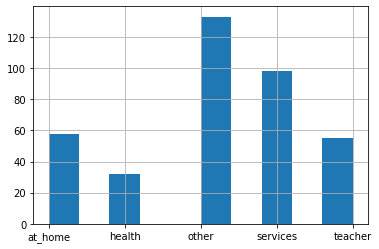

In [14]:
# рассмотрим распределение учеников по профессии матери
students.mjob.hist()
pd.DataFrame(students.mjob.value_counts())
# профессия матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает,
#'other' - другое)

По получившемуся результату можно сделать вывод о том, что подавляющее большинство матерей работают в другой отрасли и на гос. службе. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [23]:
# заменим отсутствующие значения на 'other'
students.mjob = students.mjob.apply(
    lambda x: 'other' if pd.isna(x) == True else x)
display(students.mjob.unique())
students.loc[:, ['mjob']].info()
pd.DataFrame(students.mjob.value_counts())

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,mjob
other,152
services,98
at_home,58
teacher,55
health,32


Столбец fjob

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


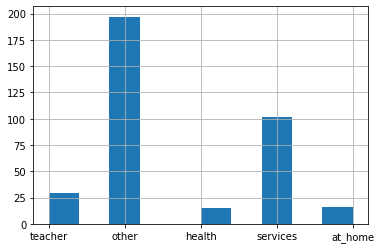

In [15]:
# рассмотрим распределение учеников по профессии отца
students.fjob.hist()
pd.DataFrame(students.fjob.value_counts())
# профессия отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает,
#'other' - другое)

По получившемуся результату можно сделать вывод о том, что подавляющее большинство отцов работают в другой отрасли и на гос. службе. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [24]:
# заменим отсутствующие значения на 'other'
students.fjob = students.fjob.apply(
    lambda x: 'other' if pd.isna(x) == True else x)
display(students.fjob.unique())
students.loc[:, ['fjob']].info()
pd.DataFrame(students.fjob.value_counts())

array(['teacher', 'other', 'health', 'services', 'at_home'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fjob
other,233
services,102
teacher,29
at_home,16
health,15


Столбец reason

,reason
course,137
home,104
reputation,103
other,34


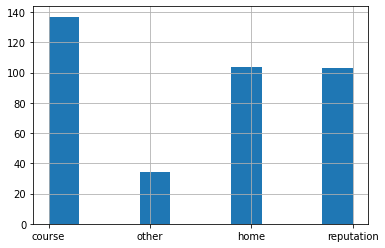

In [16]:
# рассмотрим распределение учеников по причине выбора школы
students.reason.hist()
pd.DataFrame(students.reason.value_counts())
# причине выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 
#'other' - другое)

По получившемуся результату можно сделать вывод о том, что в основном причиной выбора школы является образовательная программа. Близость к дому и репутация школы тоже являются весомыми причинами. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [25]:
# заменим отсутствующие значения на 'other'
students.reason = students.reason.apply(
    lambda x: 'other' if pd.isna(x) == True else x)
display(students.reason.unique())
students.loc[:, ['reason']].info()
pd.DataFrame(students.reason.value_counts())

array(['course', 'other', 'home', 'reputation'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,reason
course,137
home,104
reputation,103
other,51


Столбец guardian

,guardian
mother,250
father,86
other,28


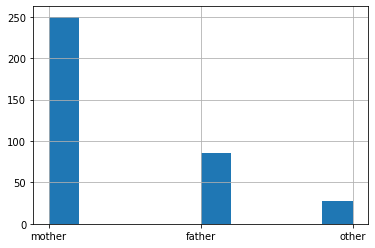

In [17]:
# рассмотрим распределение учеников по опекуну
students.guardian.hist()
pd.DataFrame(students.guardian.value_counts())

По получившемуся результату можно сделать вывод о том, что в подавляющем большинстве пекуном является мать. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [26]:
# заменим отсутствующие значения на 'other'
students.guardian = students.guardian.apply(
    lambda x: 'other' if pd.isna(x) == True else x)
display(students.guardian.unique())
students.loc[:, ['guardian']].info()
pd.DataFrame(students.guardian.value_counts())

array(['mother', 'father', 'other'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,guardian
mother,250
father,86
other,59


Столбец traveltime

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


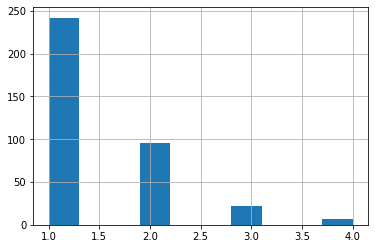

In [18]:
# рассмотрим распределение учеников по времени в пути до школы
students.traveltime.hist()
pd.DataFrame(students.traveltime.value_counts())
# (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

По получившемуся результату можно сделать вывод о том, что в подавляющем большинстве ученики живут рядом со школой. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [27]:
# заменим отсутствующие значения на медианное
median_traveltime = students.traveltime.median()
display(median_traveltime)
students.traveltime = students.traveltime.apply(
    lambda x: median_traveltime if pd.isna(x) == True else x)
display(students.traveltime.unique())
students.loc[:, ['traveltime']].info()
pd.DataFrame(students.traveltime.value_counts())

1.0

array([2., 1., 3., 4.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


Столбец studytime

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


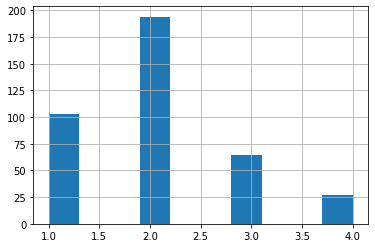

In [19]:
# рассмотрим распределение учеников по времени на учёбу помимо школы в неделю
students.studytime.hist()
pd.DataFrame(students.studytime.value_counts())
# (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

По получившемуся результату можно сделать вывод о том, что в основном ученики тратят на учебу помимо школы 5 часов и меньше. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [28]:
# заменим отсутствующие значения на медианное
median_studytime = students.studytime.median()
display(median_studytime)
students.studytime = students.studytime.apply(
    lambda x: median_studytime if pd.isna(x) == True else x)
display(students.studytime.unique())
students.loc[:, ['studytime']].info()
pd.DataFrame(students.studytime.value_counts())

2.0

array([2., 3., 1., 4.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,201
1.0,103
3.0,64
4.0,27


Столбец failures

,failures
0.0,293
1.0,49
2.0,16
3.0,15


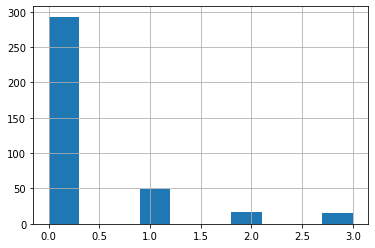

In [20]:
# рассмотрим распределение учеников по количеству внеучебных неудач
students.failures.hist()
pd.DataFrame(students.failures.value_counts())
# (n, если 1<=n<=3, иначе 0)

По получившемуся результату можно сделать вывод о том, что в подавляющем большинстве ученики обходятся без внеучебных неудач. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [29]:
# заменим отсутствующие значения на медианное
median_failures = students.failures.median()
display(median_failures)
students.failures = students.failures.apply(
    lambda x: median_failures if pd.isna(x) == True else x)
display(students.failures.unique())
students.loc[:, ['failures']].info()
pd.DataFrame(students.failures.value_counts())

0.0

array([0., 3., 2., 1.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
0.0,315
1.0,49
2.0,16
3.0,15


Столбец schoolsup

In [30]:
# рассмотрим распределение учеников по наличию дополнительной образовательной поддержки
pd.DataFrame(students.schoolsup.value_counts())

,schoolsup
no,335
yes,51


По получившемуся результату можно сделать вывод о том, что в подавляющем большинстве ученики обходятся без дополнительной образовательной поддержки. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [32]:
# заменим отсутствующие значения на 'no'
students.schoolsup = students.schoolsup.apply(
    lambda x: 'no' if pd.isna(x) == True else x)
display(students.schoolsup.unique())
students.loc[:, ['schoolsup']].info()
pd.DataFrame(students.schoolsup.value_counts())

array(['yes', 'no'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,schoolsup
no,344
yes,51


Столбец famsup

In [39]:
# рассмотрим распределение учеников по наличию семейной образовательной поддержки
pd.DataFrame(students.famsup.value_counts())

,famsup
yes,219
no,176


По получившемуся результату можно сделать вывод о том, что в подавляющем большинстве ученики пользуются семейной образовательной поддержкой. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [40]:
# заменим отсутствующие значения на 'yes'
students.famsup = students.famsup.apply(
    lambda x: 'yes' if pd.isna(x) == True else x)
display(students.famsup.unique())
students.loc[:, ['famsup']].info()
pd.DataFrame(students.famsup.value_counts())

array(['no', 'yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsup
yes,219
no,176


Столбец paid

In [41]:
# рассмотрим распределение учеников по наличию дополнительных платных занятий по математике
pd.DataFrame(students.paid.value_counts())

,paid
no,240
yes,155


По получившемуся результату можно сделать вывод о том, что приблезительно в равной степени учеников можно разделить на тех, кто платит за дополнительные занятия по математике и кто самостоятельно ей занимается. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [42]:
# заменим отсутствующие значения на 'no'
students.paid = students.paid.apply(
    lambda x: 'no' if pd.isna(x) == True else x)
display(students.paid.unique())
students.loc[:, ['paid']].info()
pd.DataFrame(students.paid.value_counts())

array(['no', 'yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
no,240
yes,155


Столбец activities

In [45]:
# рассмотрим распределение учеников по наличию дополнительных внеучебных занятий
pd.DataFrame(students.activities.value_counts())

,activities
no,200
yes,195


По получившемуся результату можно сделать вывод о том, что приблезительно в равной степени ученики посещают и не посещают дополнительные внеучебные занятия. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [46]:
# заменим отсутствующие значения на 'yes'
students.activities = students.activities.apply(
    lambda x: 'yes' if pd.isna(x) == True else x)
display(students.activities.unique())
students.loc[:, ['activities']].info()
pd.DataFrame(students.activities.value_counts())

array(['no', 'yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
no,200
yes,195


Столбец nursery

In [24]:
# рассмотрим распределение учеников по посещению детского сада
pd.DataFrame(students.nursery.value_counts())

,nursery
yes,300
no,79


По получившемуся результату можно сделать вывод о том, что подавляющее большинство учеников посещало детский сад. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [47]:
# заменим отсутствующие значения на 'yes'
students.nursery = students.nursery.apply(
    lambda x: 'yes' if pd.isna(x) == True else x)
display(students.nursery.unique())
students.loc[:, ['nursery']].info()
pd.DataFrame(students.nursery.value_counts())

array(['yes', 'no'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
yes,316
no,79


Столбец studytime_granular

Значение данной переменной изначально непонятно, попробуем выяснить при помощи корелляционного анализа, связанные с studytime_granular переменные. Выведем на экран тепловой график:

<AxesSubplot:>

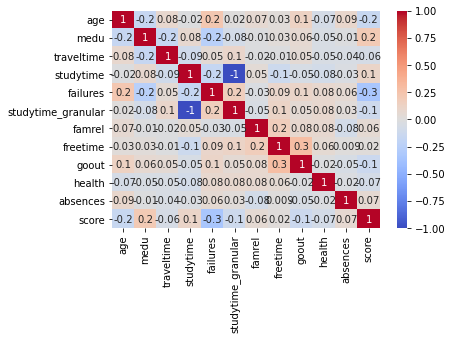

In [48]:
corallation = students.corr()
sns.heatmap(corallation, annot = True, cmap = 'coolwarm', fmt='.1g', vmin=-1, vmax=1, center= 0)

По результатам анализа графиков можно увидеть связь между параметрами studytime_granular и studytime. studytime_granular находится в полной зависимости от studytime. Формулу зависимоси можно написать в следующем виде: studytime_granular = studytime*(-3) Из чего можно сделать вывод о том, что studytime_granular можно не учитывать в анализе, либо учитывать ее в равной степени с studytime.

Столбец higher

In [26]:
# рассмотрим распределение учеников по желанию получить высшее образование
pd.DataFrame(students.higher.value_counts())

,higher
yes,356
no,19


По получившемуся результату можно сделать вывод о том, что подавляющее большинство учеников хочет получить высшее образование. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [49]:
# заменим отсутствующие значения на 'yes'
students.higher = students.higher.apply(
    lambda x: 'yes' if pd.isna(x) == True else x)
display(students.higher.unique())
students.loc[:, ['higher']].info()
pd.DataFrame(students.higher.value_counts())

array(['yes', 'no'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
yes,376
no,19


Столбец internet

In [27]:
# рассмотрим распределение учеников по наличию интернета дома
pd.DataFrame(students.internet.value_counts())

,internet
yes,305
no,56


По получившемуся результату можно сделать вывод о том, что у подавляющего большинства учеников дома есть интернет. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [50]:
# заменим отсутствующие значения на 'yes'
students.internet = students.internet.apply(
    lambda x: 'yes' if pd.isna(x) == True else x)
display(students.internet.unique())
students.loc[:, ['internet']].info()
pd.DataFrame(students.internet.value_counts())

array(['yes', 'no'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,internet
yes,339
no,56


Столбец romantic

In [28]:
# рассмотрим распределение учеников по наличию романтических отношений
pd.DataFrame(students.romantic.value_counts())

,romantic
no,240
yes,124


По получившемуся результату можно сделать вывод о том, что у большинства учеников нет романтических отношений. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [51]:
# заменим отсутствующие значения на 'no'
students.romantic = students.romantic.apply(
    lambda x: 'no' if pd.isna(x) == True else x)
display(students.romantic.unique())
students.loc[:, ['romantic']].info()
pd.DataFrame(students.romantic.value_counts())

array(['no', 'yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
no,271
yes,124


Столбец famrel

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


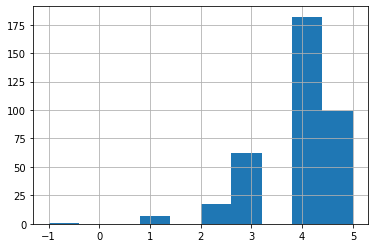

In [29]:
# рассмотрим распределение учеников по семейным отношениям
students.famrel.hist()
pd.DataFrame(students.famrel.value_counts())
# (от 1 - очень мало до 5 - очень много)

По получившемуся результату можно сделать вывод о том, что у большинства учеников хорошие отношения в семье. В значениях присутствует выброс, который необходимо устранить. В данном случае можно предположит, что при внесении данных была допущена описка и вместо 1 случайно добавили знак 'минус'. Необходимо убрать этот знак. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [53]:
# устраним выброс значения
students.famrel = students.famrel.astype(str).apply(
    lambda x: '1.0' if x== '-1.0' else x)
students.loc[:, ['famrel']].info()
pd.DataFrame(students.famrel.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


In [54]:
# заменим отсутствующие значения на медианное
median_famrel = students.famrel.median()
display(median_famrel)
students.famrel = students.famrel.apply(
    lambda x: median_famrel if pd.isna(x) == True else x)
display(students.famrel.unique())
students.loc[:, ['famrel']].info()
pd.DataFrame(students.famrel.value_counts())

4.0

array(['4.0', '5.0', '3.0', '1.0', '2.0'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famrel  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


Столбец freetime

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


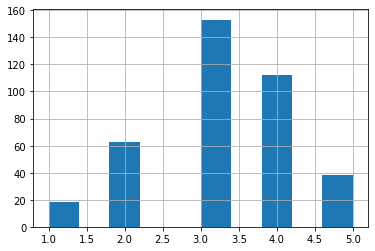

In [31]:
# рассмотрим распределение учеников по проведению времени с друзьями
students.freetime.hist()
pd.DataFrame(students.freetime.value_counts())
# (от 1 - очень мало до 5 - очень много)

По получившемуся результату можно сделать вывод о том, что средний показатель свободного времени после школы у учеников около 3-4 часов. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [55]:
# заменим отсутствующие значения на медианное
median_freetime = students.freetime.median()
display(median_freetime)
students.freetime = students.freetime.apply(
    lambda x: median_freetime if pd.isna(x) == True else x)
display(students.freetime.unique())
students.loc[:, ['freetime']].info()
pd.DataFrame(students.freetime.value_counts())

3.0

array([3., 2., 4., 1., 5.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


Столбец goout

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


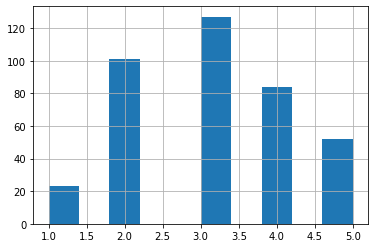

In [32]:
# рассмотрим распределение учеников по проведению времени с друзьями
students.goout.hist()
pd.DataFrame(students.goout.value_counts())
# (от 1 - очень мало до 5 - очень много)

По получившемуся результату можно сделать вывод о том, что показатель проведения времени с друзьями у учеников находится ближе к среднему значению. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [56]:
# заменим отсутствующие значения на медианное
median_goout = students.goout.median()
display(median_goout)
students.goout = students.goout.apply(
    lambda x: median_goout if pd.isna(x) == True else x)
display(students.goout.unique())
students.loc[:, ['goout']].info()
pd.DataFrame(students.goout.value_counts())

3.0

array([4., 3., 2., 1., 5.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


Столбец health

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


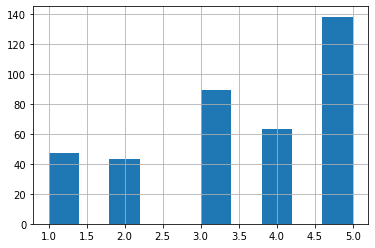

In [33]:
# рассмотрим распределение учеников по текущему состоянию здоровья
students.health.hist()
pd.DataFrame(students.health.value_counts())
# (от 1 - очень плохо до 5 - очень хорошо)

По получившемуся результату можно сделать вывод о том, что показатель состояния здоровья у учеников имеет практически разброс значений. Также можно сказать о наличии отсутствующих данных в данном столбце.

In [57]:
# заменим отсутствующие значения на медианное
median_health = students.health.median()
display(median_health)
students.health = students.health.apply(
    lambda x: median_health if pd.isna(x) == True else x)
display(students.health.unique())
students.loc[:, ['health']].info()
pd.DataFrame(students.health.value_counts())

4.0

array([3., 5., 1., 2., 4.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


Столбец absences

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


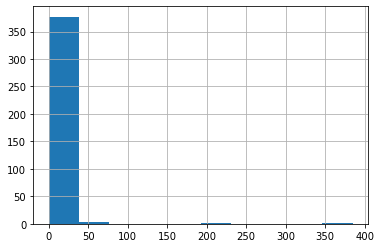

In [34]:
# рассмотрим распределение учеников по количеству пропущенных занятий
students.absences.hist()
pd.DataFrame(students.absences.value_counts())

По получившемуся результату можно сделать вывод о том, что в основном ученики стараются посещать занятия. Мы можем наблюдать достаточно большой разброс данных. Необходимо отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Также можно сказать о наличии отсутствующих данных в данном столбце. 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


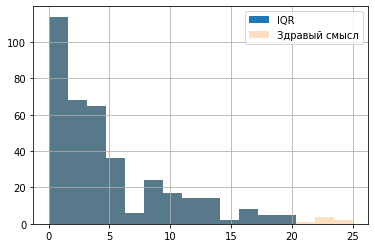

In [80]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students.absences.loc[students.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (0, 25), label = 'IQR')
 
students.absences.loc[students.absences <= 100].hist(
alpha = 0.25, bins = 16, range = (0, 25), label = 'Здравый смысл')
 
plt.legend();

In [58]:
# заменим отсутствующие значения на медианное
median_absences = students.absences.median()
display(median_absences)
students.absences = students.absences.apply(
    lambda x: median_absences if pd.isna(x) == True else x)
display(students.absences.unique())
students.loc[:, ['absences']].info()
pd.DataFrame(students.absences.value_counts())

4.0

array([  6.,   4.,  10.,   2.,   0.,  16.,  14.,   7.,   8.,  25.,  12.,
        54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
         3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,  40.,
        23.,  17., 212.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Столбец score

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


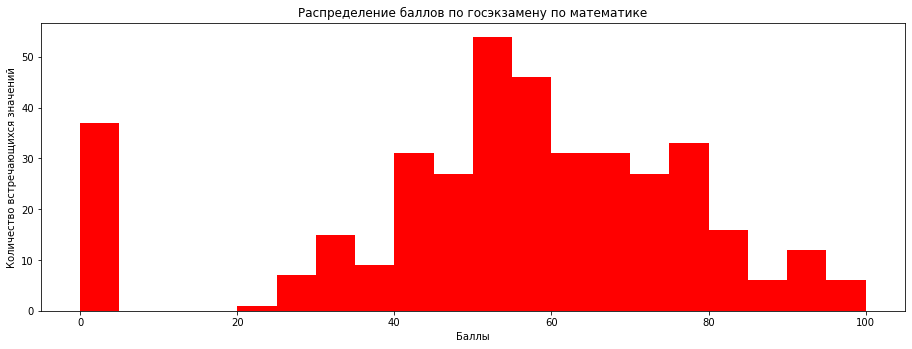

In [35]:
# рассмотрим распределение учеников по баллам по госэкзамену по математике
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1])
axes.hist(students['score'], bins = 20, color = 'red')
axes.set_title('Распределение баллов по госэкзамену по математике')
axes.set_ylabel('Количество встречающихся значений')
axes.set_xlabel('Баллы')

pd.DataFrame(students.score.value_counts())

По получившемуся результату можно сделать вывод о том, что большинство учеников получили средний балл. Достаточно много учеников получили 0 баллов. Также можно сказать о наличии отсутствующих данных в данном столбце. 

In [59]:
# заменим отсутствующие значения на медианное
median_score = students.score.median()
display(median_score)
students.score = students.score.apply(
    lambda x: median_score if pd.isna(x) == True else x)
display(students.score.unique())
students.loc[:, ['score']].info()
pd.DataFrame(students.score.value_counts())

55.0

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  20.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,score
50.0,54
55.0,52
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Посмотрим, различаются ли распределения баллов в зависимости от значения других переменных. Применим анализ номинативных переменных при помощи box-plot

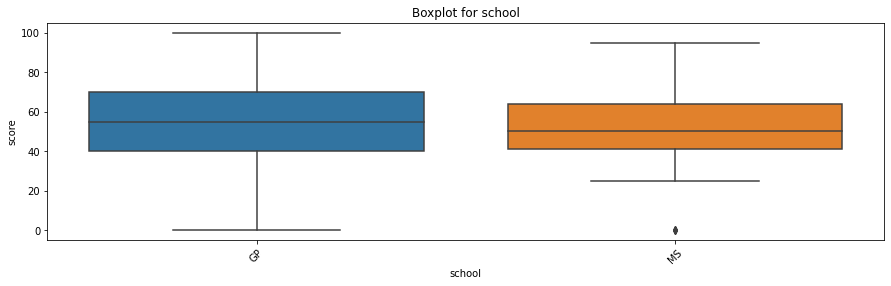

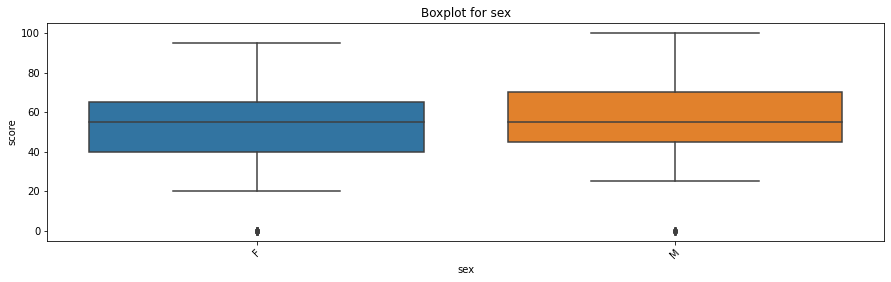

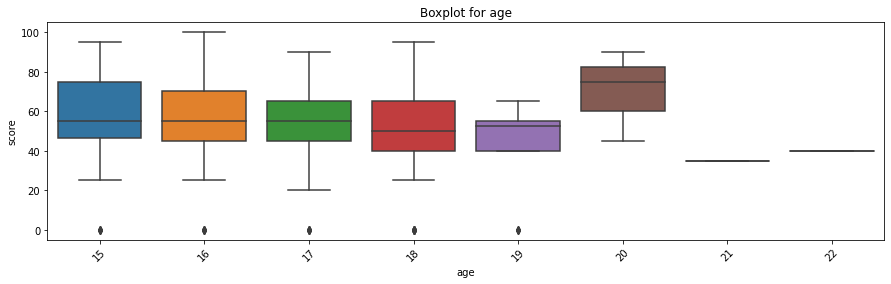

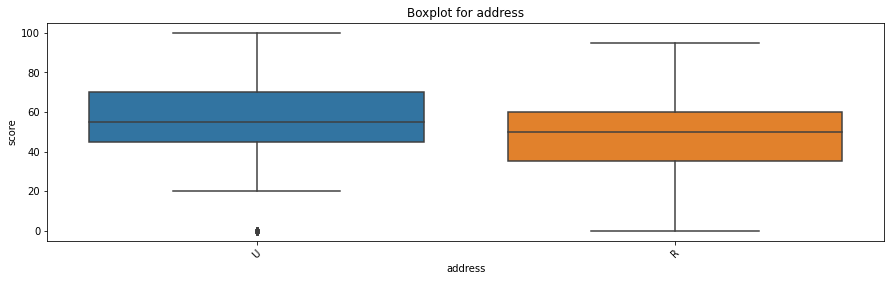

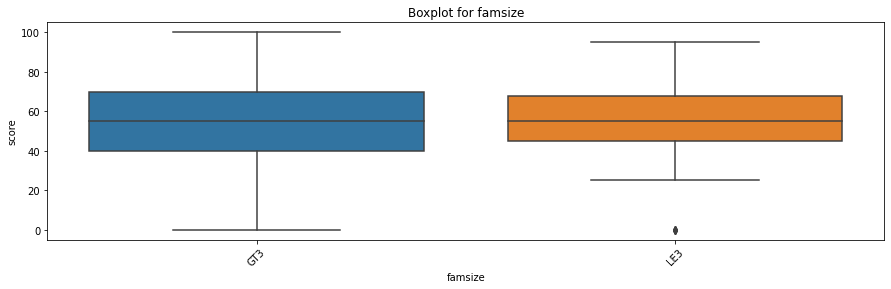

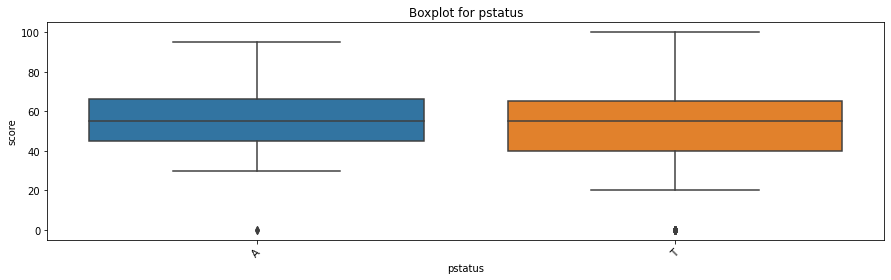

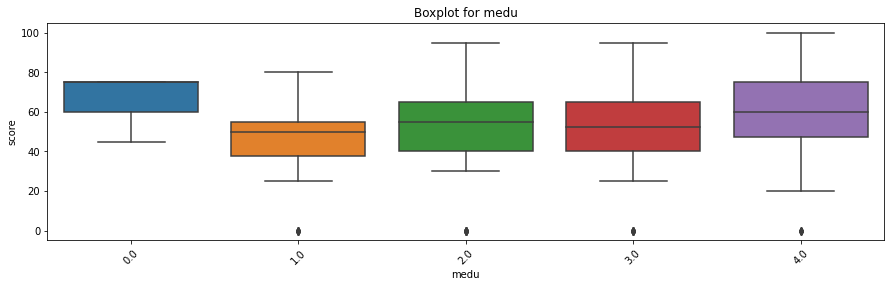

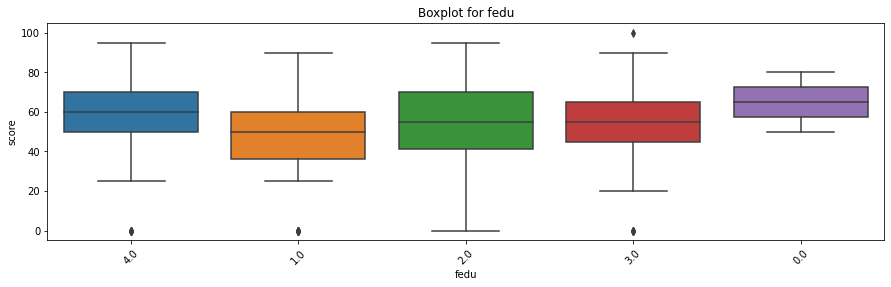

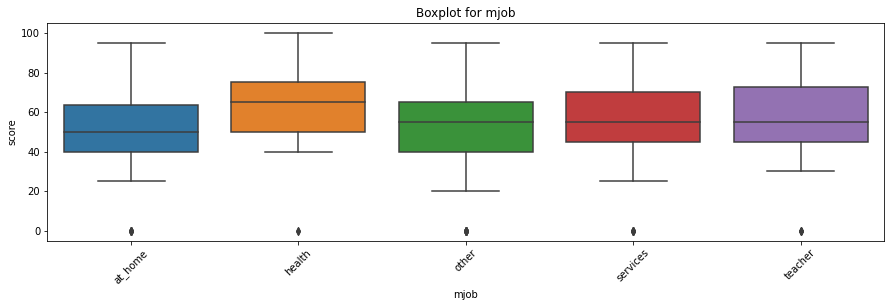

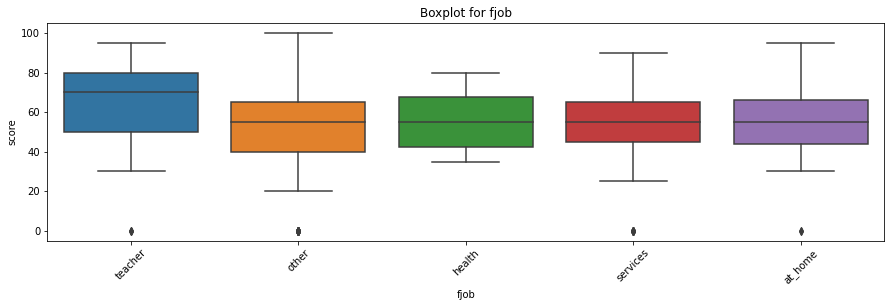

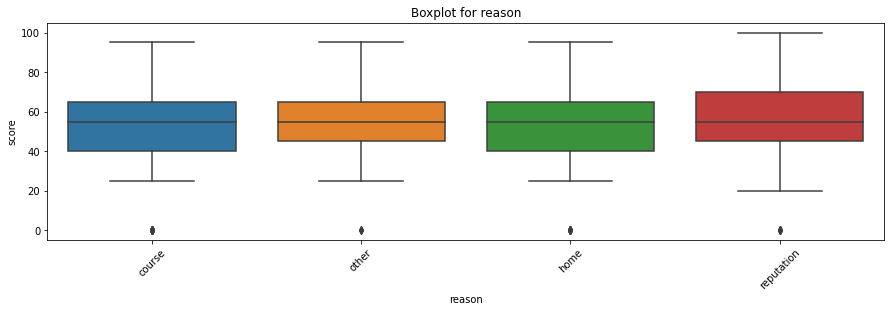

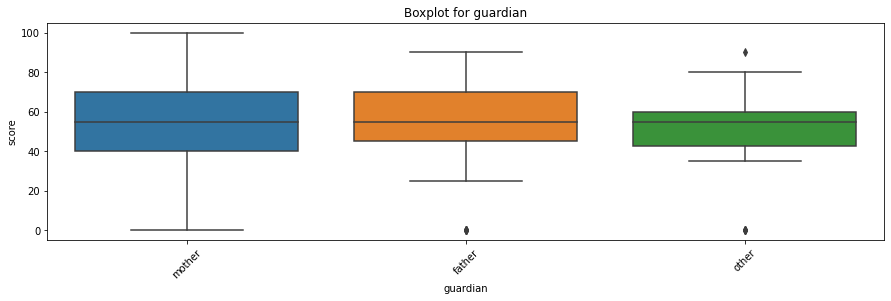

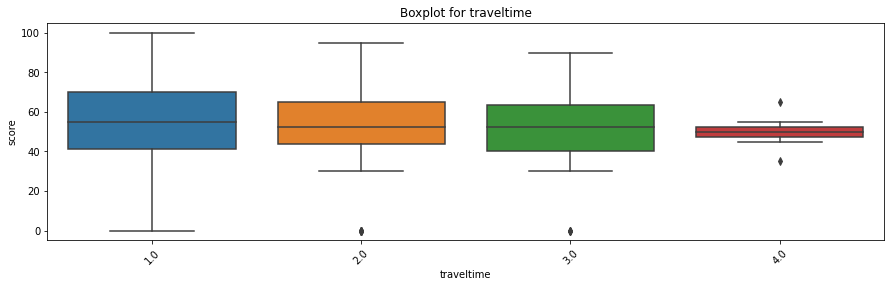

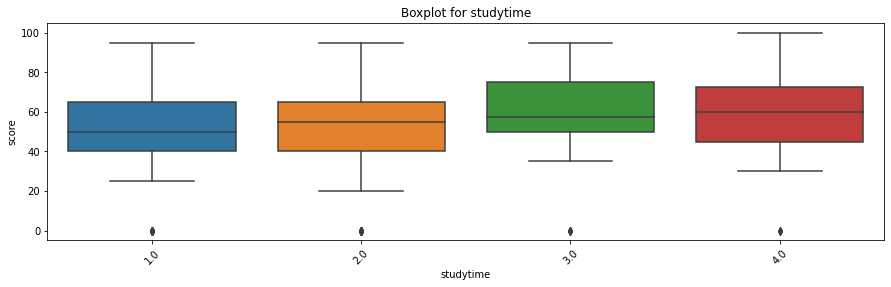

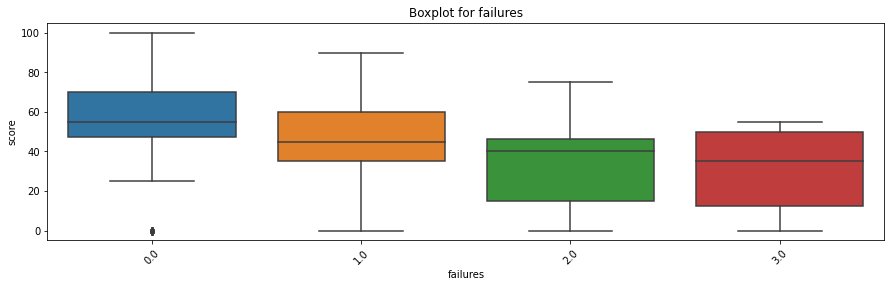

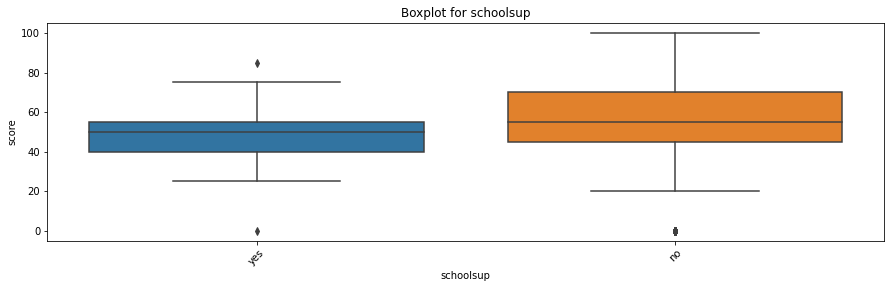

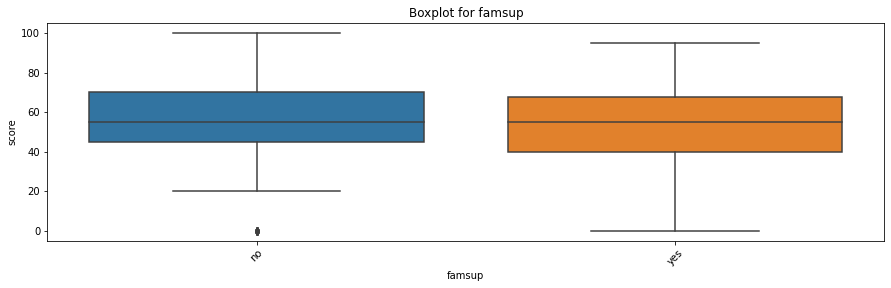

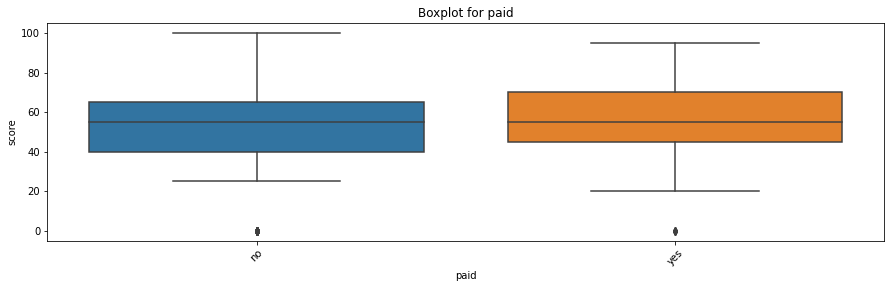

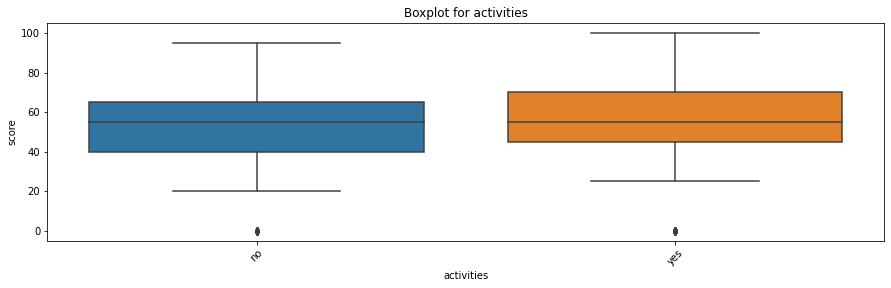

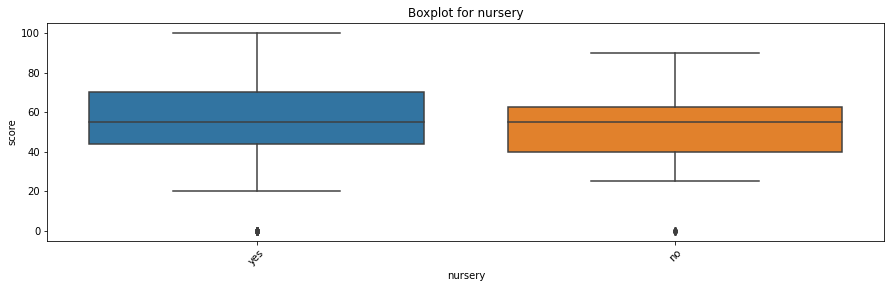

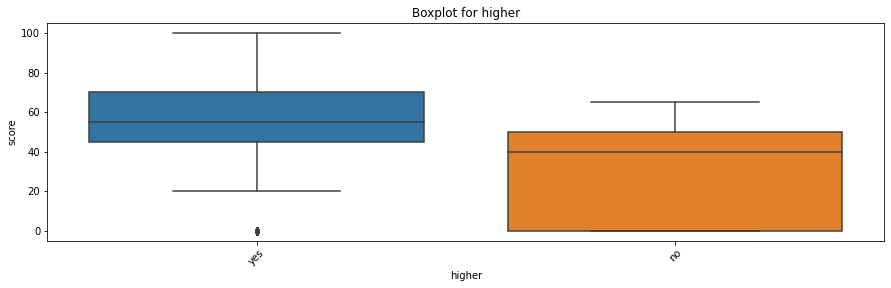

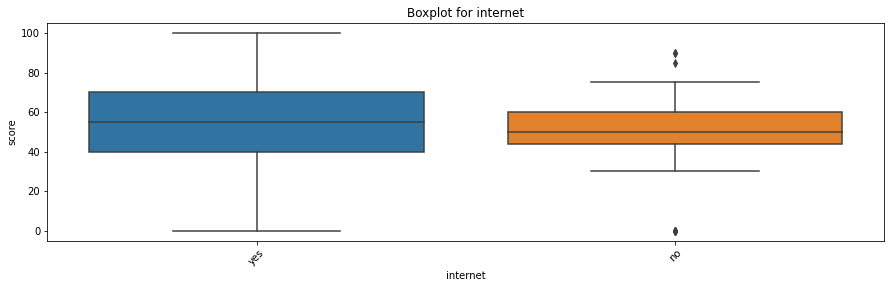

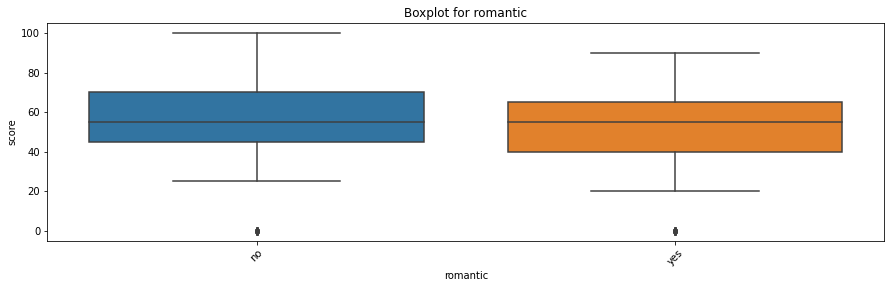

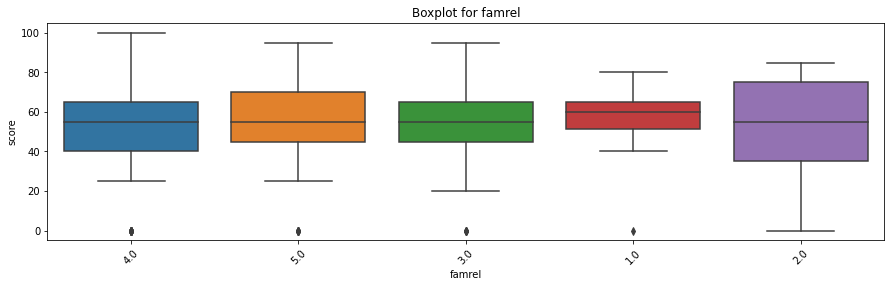

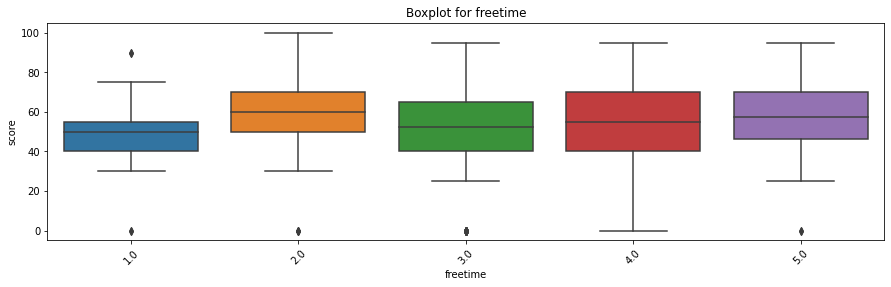

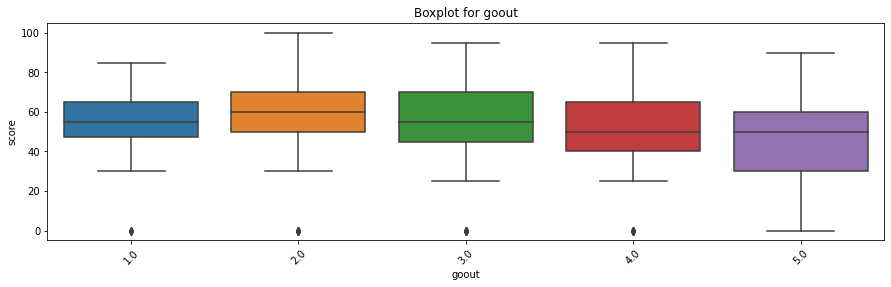

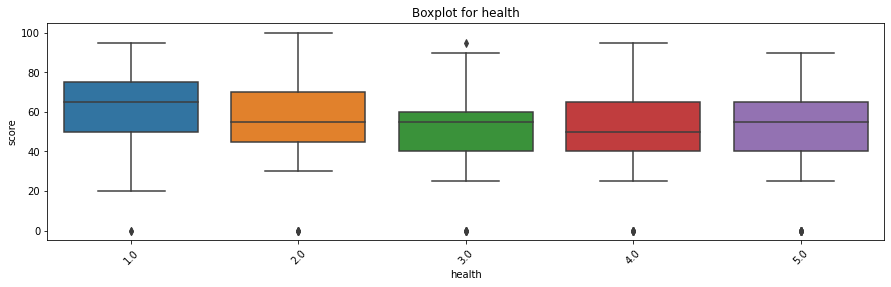

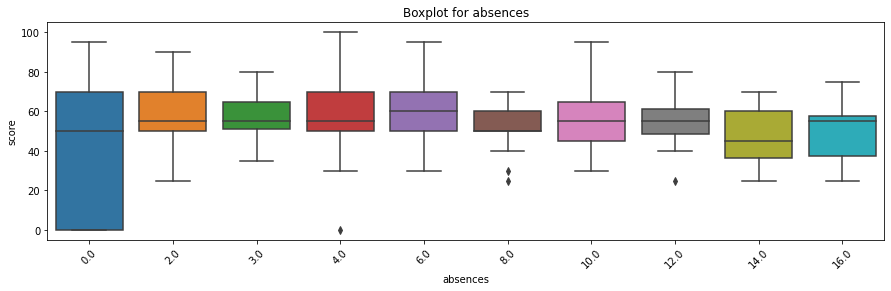

In [73]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
            'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

По получившимся графикам можно сразу отбросить все параметры, которые влияют на балл в самой меньшей степени. Это такие параметры, как: sex, famesize, pstatus, reason, guardian, famsup, paid, activities, nursery, romantic. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по различным параметрам неразличимы:

In [67]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'age', 'address', 'medu', 'fedu', 'mjob', 'fjob', 'traveltime', 'studytime', 'failures', 'schoolsup',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences


Как мы видим, серьёзно отличаются шесть параметров: address, medu, mjob, failures, higher, romantic, absences. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: address, medu, mjob, failures, higher, romantic, absences.

In [68]:
students_for_model = students.loc[:, [
    'address', 'medu', 'mjob', 'failures', 'higher', 'romantic', 'absences']]
students_for_model.head()

,address,medu,mjob,failures,higher,romantic,absences
0,U,4.0,at_home,0.0,yes,no,6.0
1,U,1.0,at_home,0.0,yes,no,4.0
2,U,1.0,at_home,3.0,yes,no,10.0
3,U,4.0,health,0.0,yes,yes,2.0
4,U,3.0,other,0.0,yes,no,4.0


ВЫВОДЫ:

Итак, в результате EDA для анализа влияния различных влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска, были получены следующие выводы:
- В данных достаточно мало пустых значений;
- Выбросы найдены только в столбцах с семейными отношениями и образованием отца, что позволяет сделать вывод о том, что данные достаточно чистые;
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: address, medu, mjob, failures, higher, romantic, absences;
- Удивительным выглядит то, что параметр нахождения ученика в романтических отношениях попал в статус значимых, ведь по графику box-plot мы не видим явного влияния на баллы. Также, анализируя графики box-plot, мы можем увидеть практически у каждого параметра значение, которое явно влияет на итоговый балл по госэкзамену. Например, мы можем утверждать, что 20-летний городской здоровый беспроблемный ученик с возможностью пользоваться интернетом, который учится в школе GP, не прогуливает занятия и хочет получить высшее образование, у которого родители с высшим образованием, работающие в сфере медицины или образования, имеет набольшие шансы получить высокий балл по госэкзамену по математике;
- Если же взять наши параметры для построения модели и оставить те параметры, на которые государство может повлиять для улучшения успеваемости учащихся по математике, то останутся такие параметры, как: address, failures, higher, absences. На такие параметры, как образование и работа матери, а также нахождение ученика в романтических отношениях государство повлиять явно не сможет. А вот улучшить условия по ипотеке для покупки жилья в городе, организации послешкольного досуга и общей занятости молодежи, поднятие престижа высшего образования и мер по недопущения прогулов в школе нормальному государству по силам.